<table> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="..\images\qworld.jpg" width="25%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by Berat Yenilen, Utku Birkan, Arda Çınar and Özlem Salehi (<a href="http://qworld.lu.lv/index.php/qturkey/" target="_blank">QTurkey</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $


<h1> <font color="blue"> Solutions for </font> Bernstein-Vazirani Problem   </h1>   

<a id="task1"></a>
### Task 1

- Using how many queries can you solve the problem clasically? How many queries if you use a probabilistic algorithm?
- How many queries do you think we need to make if we are to solve the problem with a quantum computer? 

<h3>Solution</h3>

Let's illustrate the solution over an example.

Let $n$ = 4 and let's make the following queries to function $f$.

\begin{align*}
f(1000) &= s_1.1 + s_2.0 + s_3.0 + s_4.0 = s_1\\
f(0100) &= s_1.0 + s_2.1 + s_3.0 + s_4.0 = s_2\\
f(0010) &= s_1.0 + s_2.0 + s_3.1 + s_4.0 = s_3\\
f(0001) &= s_1.0 + s_2.0 + s_3.0 + s_4.1 = s_4\\
\end{align*}

We need $n$ queries and this is an optimal way of solving this problem by classical and probabilistic
algorithms. For further information about why classical and probabilistic algorithms can not perform better, please refer
to Information Theory.

<a id="task2"></a>
### Task 2

What can we say about the $f:\{0,1\}^n \rightarrow \{0,1\}$ function if $s = 0^n$?

<h3>Solution</h3>

If $s=0^n$, then $f(x)=0$ for all $x$.

<a id="task3"></a>
### Task 3

Given an oracle function `bv_oracle()` that constructs a 6 qubit oracle circuit ($s$ has length 5) for $f$,construct a circuit that implements the algorithm described above to find out $s$.

Note that qubit 5 is the output qubit.

Run the following cell to load function `bv_oracle()`.

In [1]:
%run ../include/oracle.py

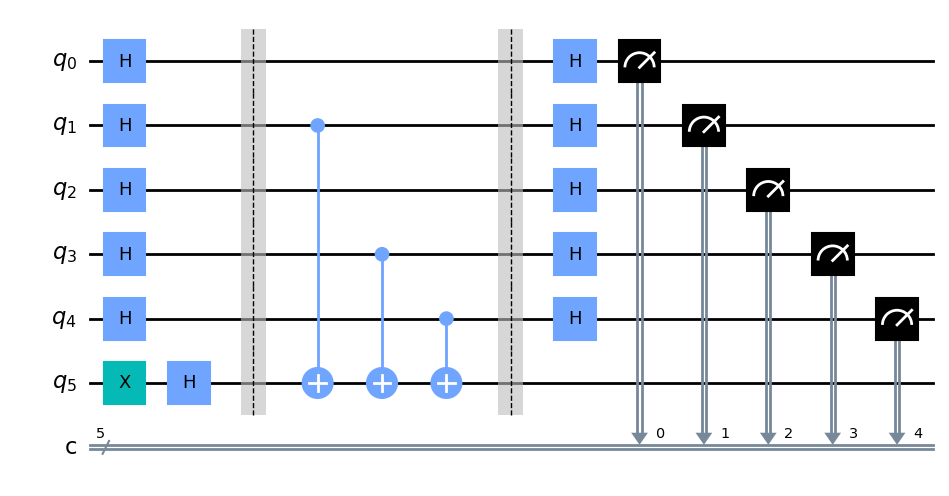

In [2]:
from qiskit import QuantumCircuit, execute, Aer

n=5  

#Create quantum circuit
bv_circuit = QuantumCircuit(n+1, n)

#Apply X gate to last qubit
bv_circuit.x(n)

#Apply Hadamard to all qubits
bv_circuit.h(range(n+1))

#Apply oracle
bv_circuit.compose(bv_oracle(), inplace=True)

#Apply Hadamard to all qubits
bv_circuit.h(range(n))

#Measure the first 4 qubits
bv_circuit.measure(range(n), range(n))

#Draw the circuit
bv_circuit.draw(output="mpl")

In [3]:
job = execute(bv_circuit, Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts()
for outcome in counts:
    reverse_outcome = ''
    for i in outcome:
        reverse_outcome = i + reverse_outcome
    print(reverse_outcome,"is observed",counts[outcome],"times")

01011 is observed 10000 times


<a id="task4"></a>
### Task 4

Given $\textbf{s} = 0110$, implement a function that returns an oracle for the function  $ f(\mathbf{x}) = \mathbf{x} \cdot \mathbf{s} $. Note that $n=4$ and you will need a cirucit with 5 qubits where qubit 4 is the output qubit.

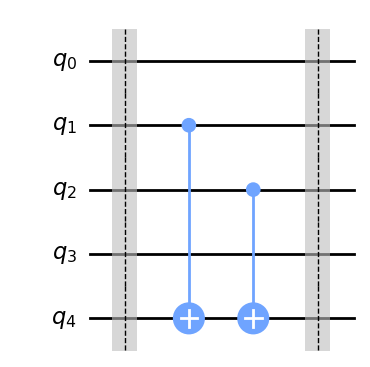

In [6]:
from qiskit import QuantumCircuit

def oracle():
    circuit = QuantumCircuit(5)
    circuit.barrier()
    
    circuit.cx(1, 4)
    circuit.cx(2, 4)
    
    circuit.barrier()
    display(circuit.draw('mpl'))
    return circuit
oracle()